
# Diagnóstico y Validación de Supuestos en Regresión Lineal

En un modelo de regresión lineal, se establecen ciertos supuestos fundamentales que deben cumplirse para garantizar la validez de la inferencia estadística. Estos supuestos permiten justificar la aplicación del método de estimación de mínimos cuadrados ordinarios (OLS) y asegurar la validez de los intervalos de confianza, pruebas de hipótesis y predicciones.

Un modelo de regresión lineal simple tiene la forma:


$$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$$


donde:

- $Y_i$ es la variable dependiente,
- $X_i$ es la variable independiente,
- $\beta_0$ es el intercepto,
- $\beta_1$ es el coeficiente de la pendiente,
- $\epsilon_i$ es el término de error aleatorio.

Para que las estimaciones sean eficientes e insesgadas, deben cumplirse los siguientes cuatro supuestos fundamentales:

## 1. Supuesto de Linealidad
Este supuesto establece que la relación entre la variable dependiente $Y$ y la variable independiente $X$ es lineal en los parámetros. Esto significa que el modelo correcto debe tener la forma adecuada y no existir términos cuadráticos o interacciones mal especificadas.

Una forma de verificar la linealidad es mediante un gráfico de dispersión entre $Y$ y $X$. Si la relación es lineal, los puntos seguirán un patrón rectilíneo.

Matemáticamente, esto se expresa como:


$$E[Y | X] = \beta_0 + \beta_1 X$$

Si la relación es incorrectamente especificada, por ejemplo, si la verdadera relación es no lineal como:

$$E[Y | X] = \beta_0 + \beta_1 X + \beta_2 X^2$$

entonces la omisión del término $X^2$ resultará en un modelo mal especificado y sesgado.

## 2. Supuesto de Independencia de Errores
Los errores $\epsilon_i$ deben ser independientes entre sí. Específicamente, no deben estar correlacionados en el tiempo o entre observaciones sucesivas.

Matemáticamente, se requiere que:

$$Cov(\varepsilon_i, \varepsilon_j) = 0, \quad \forall i \neq j$$


Si los errores no son independientes (es decir, si están correlacionados), eso indica que hay información extra en los errores que no se está capturando en el modelo. Cuando los errores están correlacionados, se dice que hay autocorrelación. Esto es especialmente relevante en series temporales.

Un método gráfico para verificar este supuesto es el gráfico de residuos. Si los residuos muestran un patrón sistemático en lugar de una distribución aleatoria, puede haber violación del supuesto.

Adicionalmente, se utiliza la prueba de **Durbin-Watson**, cuyo estadístico es:


$$d = \frac{\sum_{i=2}^{n} (\varepsilon_i - \varepsilon_{i-1})^2}{\sum_{i=1}^{n} \varepsilon_i^2}$$

Donde:

- $d ≈2 $ indica independencia de errores,   
- $d < 1.5$ sugiere autocorrelación positiva,
- $d > 2.5$ sugiere autocorrelación negativa.

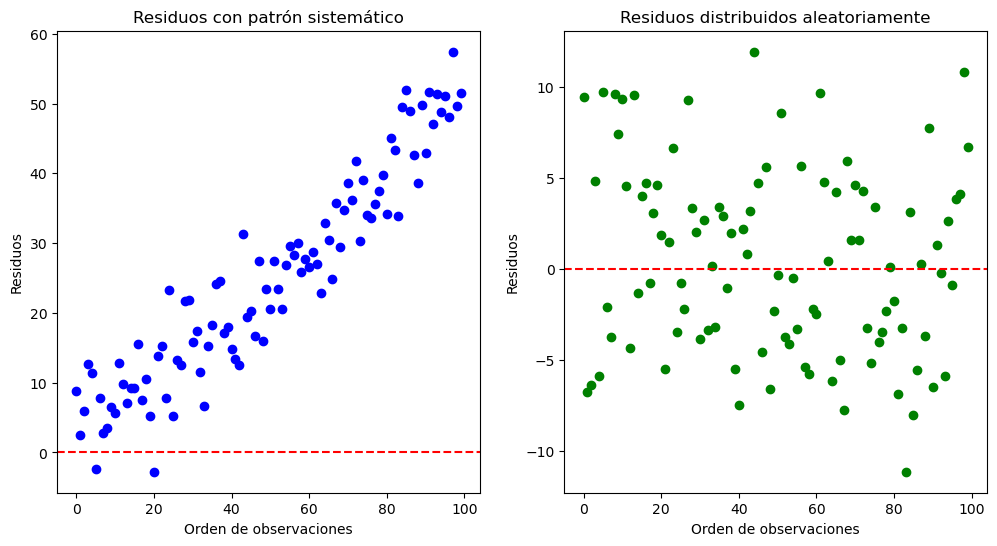

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
np.random.seed(0)
x = np.arange(100)
y_systematic = 0.5 * x + np.random.normal(0, 5, 100)  # Residuos con patrón
y_random = np.random.normal(0, 5, 100)  # Residuos aleatorios

# Gráfico de residuos con patrón sistemático
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y_systematic, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos con patrón sistemático')
plt.xlabel('Orden de observaciones')
plt.ylabel('Residuos')

# Gráfico de residuos distribuidos aleatoriamente
plt.subplot(1, 2, 2)
plt.scatter(x, y_random, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos distribuidos aleatoriamente')
plt.xlabel('Orden de observaciones')
plt.ylabel('Residuos')

plt.show()

## 3. Supuesto de Normalidad de los Errores
Se asume que los errores $\epsilon_i$ siguen una distribución normal con media cero y varianza constante:

$$
\epsilon_i \sim N(0, \sigma^2)
$$

Esto es crucial para la validez de los intervalos de confianza y pruebas de hipótesis basadas en la distribución t de Student.

La normalidad se verifica con:

- Histograma de residuos,
- Gráfico Q-Q (Quantile-Quantile Plot), donde los residuos deben alinearse en una línea de 45°.

Pruebas estadísticas como:

- Prueba de Shapiro-Wilk,
- Prueba de Kolmogorov-Smirnov,
- Prueba de Jarque-Bera (evalúa simetría y curtosis):

$$JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)$$

donde:

- $S$ es el coeficiente de asimetría,
- $K$ es la curtosis.

Si el valor de $JB$ es alto y el p-valor es pequeño, se rechaza la hipótesis de normalidad.

## 4. Supuesto de Homocedasticidad (Varianza Constante de los Errores)
Este supuesto establece que la varianza de los errores debe ser constante para todos los valores de $X$. Es decir, la dispersión de los errores no debe depender de los valores de $X$:

$$Var(\varepsilon_i) = \sigma^2, \quad \forall i$$

Si la varianza de los errores cambia con $X$, se dice que hay heterocedasticidad, lo que afecta la eficiencia de los estimadores.

Se verifica mediante:

- Gráfico de residuos vs valores predichos: Si hay un patrón en forma de embudo (los residuos aumentan o disminuyen a medida que crece $X$), hay heterocedasticidad.Un patrón aleatorio, sin una estructura visible, es consistente con la homocedasticidad.
  
- Prueba de Breusch-Pagan: Esta prueba formal permite evaluar si hay heterocedasticidad. La hipótesis nula de la prueba establece que la varianza de los errores es constante (homocedasticidad):

  $ H_0: Var(\varepsilon_i) = \sigma^2, \quad \forall i  -    (homocedasticidad) $

El estadístico se calcula como:

$$BP = \frac{n}{2} R^2$$

donde $R^2$ proviene de una regresión auxiliar de los residuos al cuadrado sobre las variables explicativas. Un p-valor pequeño indica heterocedasticidad.



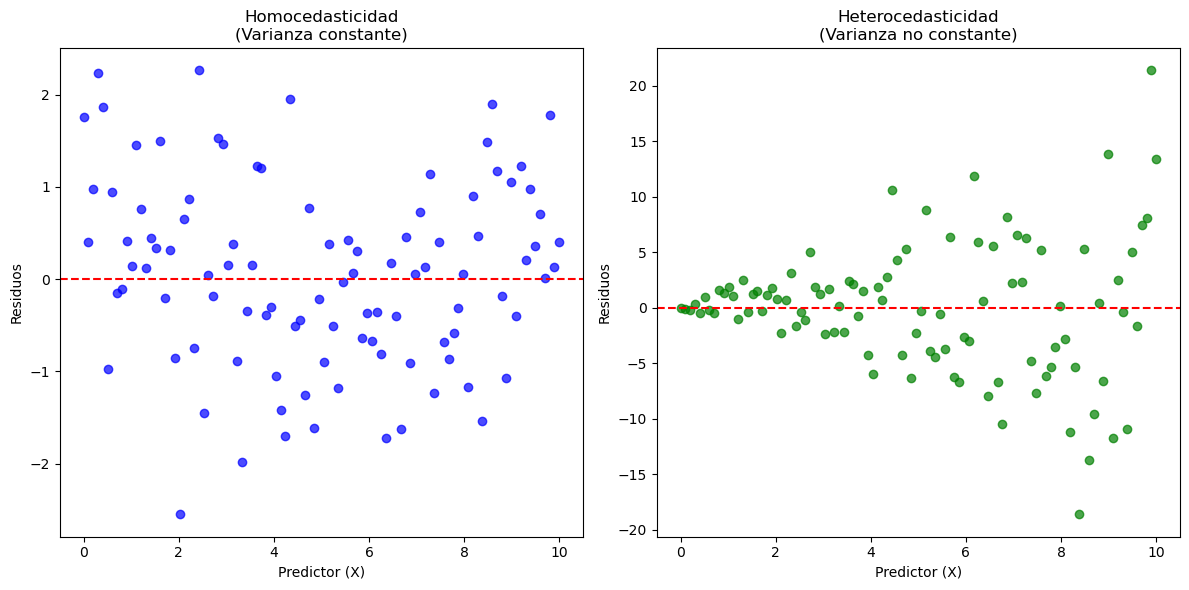

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
np.random.seed(0)
x = np.linspace(0, 10, 100)

# Homocedasticidad: residuos con varianza constante
y_homocedastic = 2 * x + np.random.normal(0, 1, 100)  # Varianza constante

# Heterocedasticidad: residuos con varianza no constante
y_heterocedastic = 2 * x + np.random.normal(0, x, 100)  # Varianza aumenta con x

# Gráfico de homocedasticidad
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y_homocedastic - (2 * x), color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homocedasticidad\n(Varianza constante)')
plt.xlabel('Predictor (X)')
plt.ylabel('Residuos')

# Gráfico de heterocedasticidad
plt.subplot(1, 2, 2)
plt.scatter(x, y_heterocedastic - (2 * x), color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Heterocedasticidad\n(Varianza no constante)')
plt.xlabel('Predictor (X)')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

## Conclusión
Si estos supuestos no se cumplen, la inferencia estadística basada en la regresión lineal se vuelve inválida. Sin embargo, el modelo aún puede usarse para predicciones, aunque con menor confiabilidad.

Si se detectan violaciones:

- Para falta de linealidad, se pueden incluir términos polinómicos o transformaciones de las variables.
- Para autocorrelación, se pueden usar modelos de series temporales como ARIMA o modelos de regresión con errores autorregresivos.
- Para no normalidad, se pueden aplicar transformaciones como logaritmos o Box-Cox.
- Para heterocedasticidad, se pueden usar estimadores robustos de varianza o aplicar modelos como WLS (Weighted Least Squares).

Cumplir estos supuestos es esencial para garantizar que las inferencias obtenidas a partir de la regresión sean confiables y útiles en la práctica.